In [1]:
import pandas as pd
import kagglehub

# Download latest version
path = kagglehub.dataset_download("varsharam/walmart-sales-dataset-of-45stores")

print("Path to dataset files:", path)

import os
# Carregando um dos arquivos CSV com pandas
csv_path = os.path.join(path, "walmart-sales-dataset-of-45stores.csv")  # Exemplo de nome; ajuste conforme o print acima
df = pd.read_csv(csv_path)
print("Path to dataset files:", path)

Path to dataset files: /Users/guilhermemartins/.cache/kagglehub/datasets/varsharam/walmart-sales-dataset-of-45stores/versions/1
Path to dataset files: /Users/guilhermemartins/.cache/kagglehub/datasets/varsharam/walmart-sales-dataset-of-45stores/versions/1


In [2]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
 # Datas dos feriados (ajuste o formato conforme seus dados)
feriados = {
    "Super_Bowl": ["12-02-2010", "11-02-2011", "10-02-2012"],  # Formato DD-MM-YYYY
    "Dia_Trabalho": ["10-09-2010", "09-09-2011", "07-09-2012"],
    "Acao_de_Gracas": ["26-11-2010", "25-11-2011", "23-11-2012"],
    "Natal": ["31-12-2010", "30-12-2011", "28-12-2012"]
}

In [4]:
# Criando as colunas para cada feriado com valor 0 inicialmente
for feriado in feriados:
    df[feriado] = 0

# Preenchendo com 1 nas datas correspondentes
for feriado, datas in feriados.items():
    df.loc[df['Date'].astype(str).isin(datas), feriado] = 1

In [5]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Dia_Trabalho,Acao_de_Gracas,Natal
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,0,0,0,0
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,1,0,0,0
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,0,0,0,0
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,0,0,0,0
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,0,0,0,0


In [7]:
# Lista das novas colunas na ordem correspondente
novas_colunas = [
    'Loja', 
    'Data', 
    'Vendas_Semanais', 
    'Feriado', 
    'Temperatura', 
    'Preco_Gasolina', 
    'Indice_Precos', 
    'Desemprego', 
    'Super_Bowl', 
    'Dia_do_Trabalho', 
    'Acao_de_Gracas', 
    'Natal'
]

# Renomeando as colunas do DataFrame
df.columns = novas_colunas

# Verificando o resultado
print(df.head())

   Loja        Data  Vendas_Semanais  Feriado  Temperatura  Preco_Gasolina  \
0     1  05-02-2010       1643690.90        0        42.31           2.572   
1     1  12-02-2010       1641957.44        1        38.51           2.548   
2     1  19-02-2010       1611968.17        0        39.93           2.514   
3     1  26-02-2010       1409727.59        0        46.63           2.561   
4     1  05-03-2010       1554806.68        0        46.50           2.625   

   Indice_Precos  Desemprego  Super_Bowl  Dia_do_Trabalho  Acao_de_Gracas  \
0     211.096358       8.106           0                0               0   
1     211.242170       8.106           1                0               0   
2     211.289143       8.106           0                0               0   
3     211.319643       8.106           0                0               0   
4     211.350143       8.106           0                0               0   

   Natal  
0      0  
1      0  
2      0  
3      0  
4      0  


In [8]:
df.columns

Index(['Loja', 'Data', 'Vendas_Semanais', 'Feriado', 'Temperatura',
       'Preco_Gasolina', 'Indice_Precos', 'Desemprego', 'Super_Bowl',
       'Dia_do_Trabalho', 'Acao_de_Gracas', 'Natal'],
      dtype='object')

In [9]:
df.dtypes

Loja                 int64
Data                object
Vendas_Semanais    float64
Feriado              int64
Temperatura        float64
Preco_Gasolina     float64
Indice_Precos      float64
Desemprego         float64
Super_Bowl           int64
Dia_do_Trabalho      int64
Acao_de_Gracas       int64
Natal                int64
dtype: object

In [10]:
# Converter para datetime
df['Data'] = pd.to_datetime(df['Data'], format="%d-%m-%Y")

In [11]:
df.dtypes

Loja                        int64
Data               datetime64[ns]
Vendas_Semanais           float64
Feriado                     int64
Temperatura               float64
Preco_Gasolina            float64
Indice_Precos             float64
Desemprego                float64
Super_Bowl                  int64
Dia_do_Trabalho             int64
Acao_de_Gracas              int64
Natal                       int64
dtype: object

In [12]:
df.head(5)

,Loja,Data,Vendas_Semanais,Feriado,Temperatura,Preco_Gasolina,Indice_Precos,Desemprego,Super_Bowl,Dia_do_Trabalho,Acao_de_Gracas,Natal
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,0,0,0,0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1,0,0,0
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,0,0,0,0
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,0,0,0,0
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,0,0,0,0


In [13]:
# Convertendo a coluna 'Date' para datetime se ainda não estiver
df['Data'] = pd.to_datetime(df['Data'])

# Criando uma coluna "Ano-Mês" para referência
df['Ano_Mes'] = df['Data'].dt.to_period('M')

# Agrupando por "Ano-Mês" e "Loja" para somar as vendas semanais
df_mensal = df.groupby(['Ano_Mes', 'Loja']).agg({'Vendas_Semanais': 'sum'}).reset_index()

# Renomeando a coluna para 'Monthly_Sales'
df_mensal.rename(columns={'Vendas_Semanais': 'Vendas Mensais'}, inplace=True)

In [14]:
df_mensal.head(1)

,Ano_Mes,Loja,Vendas Mensais
0,2010-02,1,6307344.1


In [15]:
# Passo 1: Criar a coluna "Ano_Mes" na df principal (se ainda não existir)
df['Ano_Mes'] = df['Data'].dt.to_period('M')

# Passo 2: Realizar o merge para trazer as vendas mensais
df = pd.merge(df, df_mensal[['Ano_Mes', 'Loja', 'Vendas Mensais']], 
              how='left', on=['Ano_Mes', 'Loja'])

# Passo 3: A coluna já está com o nome correto "Monthly_Sales" no merge
# Se quiser, pode renomear para português:
df.rename(columns={'Vendas Mensais': 'Vendas_Mensais1'}, inplace=True)

# Visualizando o resultado
print(df.head())


   Loja       Data  Vendas_Semanais  Feriado  Temperatura  Preco_Gasolina  \
0     1 2010-02-05       1643690.90        0        42.31           2.572   
1     1 2010-02-12       1641957.44        1        38.51           2.548   
2     1 2010-02-19       1611968.17        0        39.93           2.514   
3     1 2010-02-26       1409727.59        0        46.63           2.561   
4     1 2010-03-05       1554806.68        0        46.50           2.625   

   Indice_Precos  Desemprego  Super_Bowl  Dia_do_Trabalho  Acao_de_Gracas  \
0     211.096358       8.106           0                0               0   
1     211.242170       8.106           1                0               0   
2     211.289143       8.106           0                0               0   
3     211.319643       8.106           0                0               0   
4     211.350143       8.106           0                0               0   

   Natal  Ano_Mes  Vendas_Mensais1  
0      0  2010-02       6307344.10  


,Loja,Data,Vendas_Semanais,Feriado,Temperatura,Preco_Gasolina,Indice_Precos,Desemprego,Super_Bowl,Dia_do_Trabalho,Acao_de_Gracas,Natal,Ano_Mes,Vendas_Mensais1
0,1,2010-02-05,1643690.9,0,42.31,2.572,211.096358,8.106,0,0,0,0,2010-02,6307344.1


In [18]:
# Pegar todas as colunas
cols = list(df.columns)

# Remover a coluna "Vendas_Mensais" da lista
cols.remove('Vendas_Mensais1')

# Inserir a coluna "Vendas_Mensais" na terceira posição (índice 2)
cols.insert(3, 'Vendas_Mensais1')

# Reorganizar o DataFrame com a nova ordem
df = df[cols]

# Visualizando o resultado
print(df.head())

   Loja       Data  Vendas_Semanais  Vendas_Mensais1  Feriado  Temperatura  \
0     1 2010-02-05       1643690.90       6307344.10        0        42.31   
1     1 2010-02-12       1641957.44       6307344.10        1        38.51   
2     1 2010-02-19       1611968.17       6307344.10        0        39.93   
3     1 2010-02-26       1409727.59       6307344.10        0        46.63   
4     1 2010-03-05       1554806.68       5871293.98        0        46.50   

   Preco_Gasolina  Indice_Precos  Desemprego  Super_Bowl  Dia_do_Trabalho  \
0           2.572     211.096358       8.106           0                0   
1           2.548     211.242170       8.106           1                0   
2           2.514     211.289143       8.106           0                0   
3           2.561     211.319643       8.106           0                0   
4           2.625     211.350143       8.106           0                0   

   Acao_de_Gracas  Natal  Ano_Mes  
0               0      0  2010-0

In [19]:


# Renomear a coluna
df = df.rename(columns={'Vendas_Mensais1': 'Vendas_Mensais'})

In [20]:
df.head(5)

,Loja,Data,Vendas_Semanais,Vendas_Mensais,Feriado,Temperatura,Preco_Gasolina,Indice_Precos,Desemprego,Super_Bowl,Dia_do_Trabalho,Acao_de_Gracas,Natal,Ano_Mes
0,1,2010-02-05,1643690.90,6307344.10,0,42.31,2.572,211.096358,8.106,0,0,0,0,2010-02
1,1,2010-02-12,1641957.44,6307344.10,1,38.51,2.548,211.242170,8.106,1,0,0,0,2010-02
2,1,2010-02-19,1611968.17,6307344.10,0,39.93,2.514,211.289143,8.106,0,0,0,0,2010-02
3,1,2010-02-26,1409727.59,6307344.10,0,46.63,2.561,211.319643,8.106,0,0,0,0,2010-02
4,1,2010-03-05,1554806.68,5871293.98,0,46.50,2.625,211.350143,8.106,0,0,0,0,2010-03


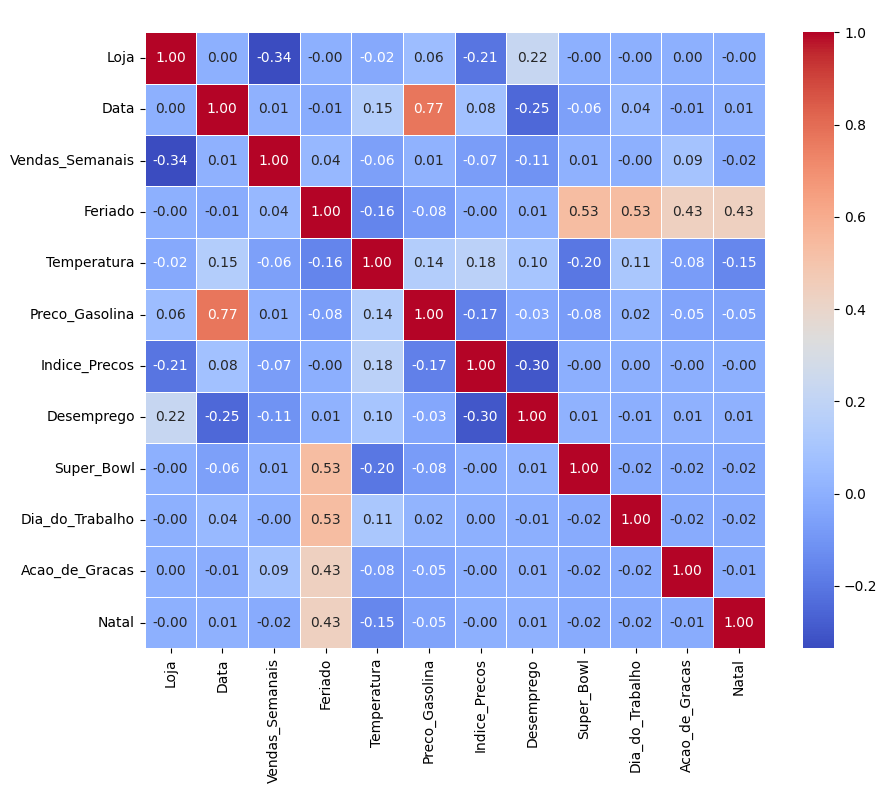

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remover a coluna "Ano_Mes" para calcular a correlação
correlation_matrix = df.drop(columns=['Ano_Mes', 'Vendas_Mensais']).corr()

# Definindo o tamanho da figura
plt.figure(figsize=(10, 8))

# Gerando o Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Ajustes de layout
plt.title(' ')
plt.show()


In [22]:
df['Vendas_Semanais'].mean()

np.float64(1046964.8775617715)

/var/folders/v0/z060jfls5zz8jvy11bglw3fw0000gn/T/ipykernel_1051/1330989219.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loja', y='Vendas_Mensais1', data=df, palette='viridis')


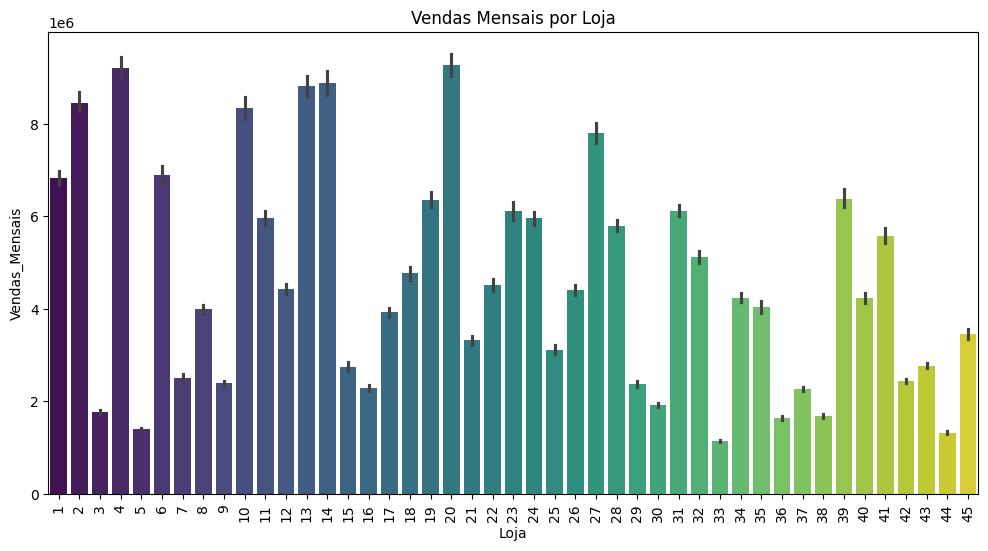

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Loja', y='Vendas_Mensais1', data=df, palette='viridis')
plt.title('Vendas Mensais por Loja')
plt.xlabel('Loja')
plt.ylabel('Vendas_Mensais')
plt.xticks(rotation=90)
plt.show()

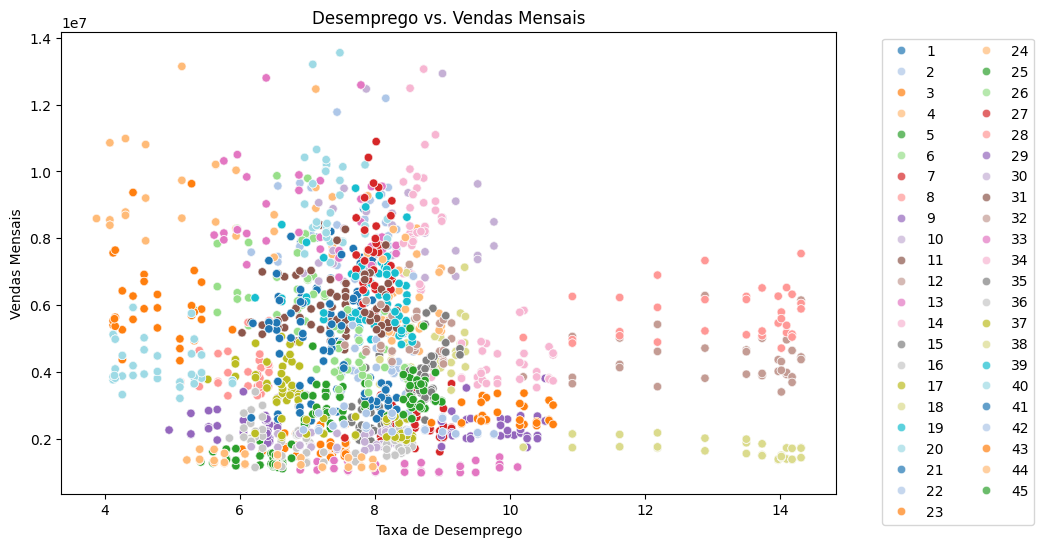

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Desemprego', y='Vendas_Mensais', data=df, hue='Loja', palette='tab20', alpha=0.7)
plt.title('Desemprego vs. Vendas Mensais')
plt.xlabel('Taxa de Desemprego')
plt.ylabel('Vendas Mensais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

# Podemos perceber as maiores vendas mensais, foram com o indice de desemprego inferior

In [32]:
print(f'O menor índice de desemprego é: {df["Desemprego"].min()}')
print(f'O maior índice de desemprego é: {df["Desemprego"].max()}')

O menor índice de desemprego é: 3.879
O maior índice de desemprego é: 14.313


In [19]:
df.head(5)

,Loja,Data,Vendas_Semanais,Vendas_Mensais,Feriado,Temperatura,Preco_Gasolina,Indice_Precos,Desemprego,Super_Bowl,Dia_do_Trabalho,Acao_de_Gracas,Natal,Ano_Mes
0,1,2010-02-05,1643690.90,6307344.10,0,42.31,2.572,211.096358,8.106,0,0,0,0,2010-02
1,1,2010-02-12,1641957.44,6307344.10,1,38.51,2.548,211.242170,8.106,1,0,0,0,2010-02
2,1,2010-02-19,1611968.17,6307344.10,0,39.93,2.514,211.289143,8.106,0,0,0,0,2010-02
3,1,2010-02-26,1409727.59,6307344.10,0,46.63,2.561,211.319643,8.106,0,0,0,0,2010-02
4,1,2010-03-05,1554806.68,5871293.98,0,46.50,2.625,211.350143,8.106,0,0,0,0,2010-03


In [37]:
df.columns

Index(['Loja', 'Data', 'Vendas_Semanais', 'Vendas_Mensais', 'Vendas_Mensais',
       'Feriado', 'Temperatura', 'Preco_Gasolina', 'Indice_Precos',
       'Desemprego', 'Super_Bowl', 'Dia_do_Trabalho', 'Acao_de_Gracas',
       'Natal', 'Ano_Mes', 'Vendas_Mensais', 'Vendas_Mensais',
       'Vendas_Mensais', 'Vendas_Mensais1'],
      dtype='object')

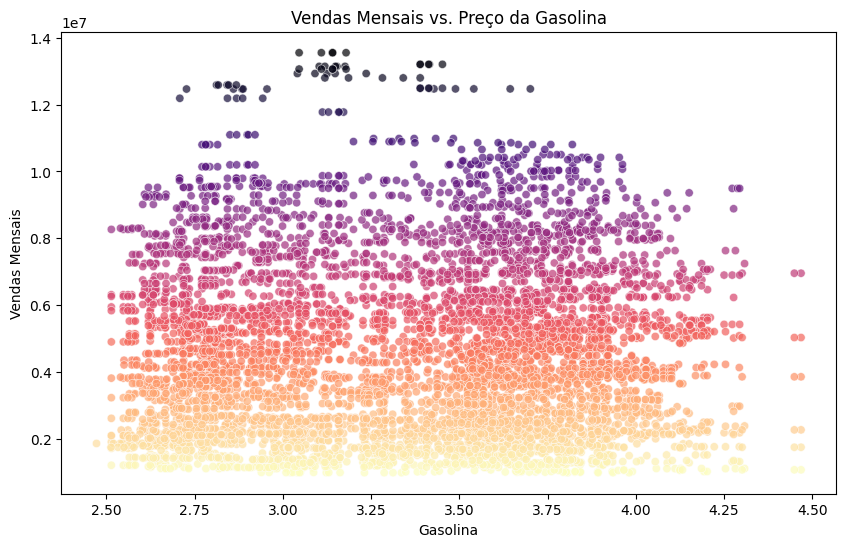

In [38]:
import matplotlib.pyplot as plt
# Criar o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Preco_Gasolina', y='Vendas_Mensais1', data=df, alpha=0.7, hue='Vendas_Mensais1', palette='magma_r', legend=False)
plt.title('Vendas Mensais vs. Preço da Gasolina')
plt.xlabel('Gasolina')
plt.ylabel('Vendas Mensais')
plt.show()

In [22]:
df.head(5)

,Loja,Data,Vendas_Semanais,Vendas_Mensais,Feriado,Temperatura,Preco_Gasolina,Indice_Precos,Desemprego,Super_Bowl,Dia_do_Trabalho,Acao_de_Gracas,Natal,Ano_Mes
0,1,2010-02-05,1643690.90,6307344.10,0,42.31,2.572,211.096358,8.106,0,0,0,0,2010-02
1,1,2010-02-12,1641957.44,6307344.10,1,38.51,2.548,211.242170,8.106,1,0,0,0,2010-02
2,1,2010-02-19,1611968.17,6307344.10,0,39.93,2.514,211.289143,8.106,0,0,0,0,2010-02
3,1,2010-02-26,1409727.59,6307344.10,0,46.63,2.561,211.319643,8.106,0,0,0,0,2010-02
4,1,2010-03-05,1554806.68,5871293.98,0,46.50,2.625,211.350143,8.106,0,0,0,0,2010-03


In [29]:
import pandas as pd

# Garantir que 'Data' seja do tipo datetime
df['Data'] = pd.to_datetime(df['Data'], errors='coerce')

# Criar a nova coluna 'Ano' extraindo o ano de 'Data'
df['Ano'] = df['Data'].dt.year

# Verificar o resultado
print(df[['Data', 'Ano']].head())

        Data   Ano
0 2010-02-05  2010
1 2010-02-12  2010
2 2010-02-19  2010
3 2010-02-26  2010
4 2010-03-05  2010


In [30]:
import pandas as pd
import xlsxwriter

# Assuming df is your DataFrame
df.to_excel('Wallmart data DA.xlsx', index=False, engine='xlsxwriter')
print("File saved successfully!")

File saved successfully!


In [27]:
pip install xlsxwriter

  Using cached XlsxWriter-3.2.3-py3-none-any.whl.metadata (2.7 kB)
Using cached XlsxWriter-3.2.3-py3-none-any.whl (169 kB)
Note: you may need to restart the kernel to use updated packages.


In [31]:
df['Vendas_Mensais'].sum()

np.float64(29593125295.410004)

In [34]:
df['Vendas_Semanais'].sum()

np.float64(6737218987.11)

In [35]:
# Verifica quantas linhas você tem no df original e no df_mensal
print(f"Linhas no df original: {len(df)}")
print(f"Linhas no df_mensal: {len(df_mensal)}")

# Verifica quantas semanas únicas por mês existem
print(df['Ano_Mes'].value_counts().sort_index())

Linhas no df original: 6435
Linhas no df_mensal: 1485
Ano_Mes
2010-02    180
2010-03    180
2010-04    225
2010-05    180
2010-06    180
2010-07    225
2010-08    180
2010-09    180
2010-10    225
2010-11    180
2010-12    225
2011-01    180
2011-02    180
2011-03    180
2011-04    225
2011-05    180
2011-06    180
2011-07    225
2011-08    180
2011-09    225
2011-10    180
2011-11    180
2011-12    225
2012-01    180
2012-02    180
2012-03    225
2012-04    180
2012-05    180
2012-06    225
2012-07    180
2012-08    225
2012-09    180
2012-10    180
Freq: M, Name: count, dtype: int64


In [36]:
# Corrigir a coluna para refletir a venda semanal correspondente (dividida pela contagem do mês)
vendas_mensais_corretas = df.groupby('Ano_Mes')['Vendas_Semanais'].sum().reset_index()
vendas_mensais_corretas.rename(columns={'Vendas_Semanais': 'Vendas_Mensais_Certas'}, inplace=True)

In [37]:
# Merge de volta na df
df = df.merge(vendas_mensais_corretas, on='Ano_Mes', how='left')

In [38]:
df.head(5)

,Loja,Data,Vendas_Semanais,Vendas_Mensais,Feriado,Temperatura,Preco_Gasolina,Indice_Precos,Desemprego,Super_Bowl,Dia_do_Trabalho,Acao_de_Gracas,Natal,Ano_Mes,Ano,Vendas_Mensais_Certas
0,1,2010-02-05,1643690.90,6307344.10,0,42.31,2.572,211.096358,8.106,0,0,0,0,2010-02,2010,1.903330e+08
1,1,2010-02-12,1641957.44,6307344.10,1,38.51,2.548,211.242170,8.106,1,0,0,0,2010-02,2010,1.903330e+08
2,1,2010-02-19,1611968.17,6307344.10,0,39.93,2.514,211.289143,8.106,0,0,0,0,2010-02,2010,1.903330e+08
3,1,2010-02-26,1409727.59,6307344.10,0,46.63,2.561,211.319643,8.106,0,0,0,0,2010-02,2010,1.903330e+08
4,1,2010-03-05,1554806.68,5871293.98,0,46.50,2.625,211.350143,8.106,0,0,0,0,2010-03,2010,1.819198e+08


In [39]:

# Remover duplicatas por loja e mês
df_unico = df.drop_duplicates(subset=['Loja', 'Ano_Mes'])

# Somar as vendas mensais considerando 1 valor por loja por mês
total_vendas_mensais_unicas = df_unico['Vendas_Mensais'].sum()

# Mostrar o resultado
print(f"Total arrecadado com as vendas mensais (sem duplicatas): ${total_vendas_mensais_unicas:,.2f}")


Total arrecadado com as vendas mensais (sem duplicatas): $6,737,218,987.11


In [40]:
print(df['Data'].min())
print(df['Data'].max())

2010-02-05 00:00:00
2012-10-26 00:00:00
